In [1]:
# The project is to find out the peak season to travel to Berlin
# How much people are willing to pay for a stay?
# important imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import datetime

In [4]:

review_data = pd.read_csv('reviews_summary.csv')

In [5]:
review_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [6]:
# There is no need of reviewer id, reviewer name and comments columns. Thus, drop these columns.
review_data.drop(['reviewer_id', 'reviewer_name', 'comments'], axis =1, inplace = True)

In [7]:
review_data.head(2)

,listing_id,id,date
0,2015,69544350,2016-04-11
1,2015,69990732,2016-04-15


In [8]:
# Number of id means number of review count so rename the label id to review_count.
review_data.rename({'id': 'review_count'}, axis =1, inplace = True)

In [9]:
# Assign value 1 to all the values of id which is now review_count column.
review_data.review_count= 1

In [10]:
review_data.head(2)

,listing_id,review_count,date
0,2015,1,2016-04-11
1,2015,1,2016-04-15


In [11]:
# Total duplicated values.
review_data.duplicated().sum()

1242

In [12]:
# Date might be present in different formats. Thus, format date column.
review_data.date = pd.to_datetime(review_data.date, format = '%Y-%m-%d')
review_data.head(2)

,listing_id,review_count,date
0,2015,1,2016-04-11
1,2015,1,2016-04-15


In [13]:
# As the scraping took place on November 07th 2018, we take data of full year starting November 1st, 2017 and ending October 31st, 2018:
data_2017_2018 = review_data[review_data['date'].isin(pd.date_range('2017-11-01', '2018-10-31'))]
data_2017_2018 = data_2017_2018.set_index('date').sort_index()
data_2017_2018.head(2)

,listing_id,review_count
date,,
2017-11-01,17184609,1
2017-11-01,18669282,1


In [14]:
# group by month and listing_id, i.e. specific apartment.
data_2017_2018 = data_2017_2018.groupby([pd.Grouper(freq = 'M'), 'listing_id'])['review_count'].agg({'review_count':{'review_per_month':'count'}}).reset_index()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:3558: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  results[name] = obj.aggregate(func)


In [15]:
data_2017_2018.head()

,date,listing_id,review_count
,,,review_per_month
0,2017-11-30,3309,1
1,2017-11-30,7071,2
2,2017-11-30,17409,3
3,2017-11-30,17904,3
4,2017-11-30,22415,2


In [16]:
# flatten multiindex
data_2017_2018.columns = ['date', 'listing_id', 'review_per_month']
data_2017_2018.set_index('date', inplace = True)

In [17]:
data_2017_2018.head(2)

,listing_id,review_per_month
date,,
2017-11-30,3309,1
2017-11-30,7071,2


In [18]:
# again get rid of date index.
data_2017_2018.reset_index()

,date,listing_id,review_per_month
0,2017-11-30,3309,1
1,2017-11-30,7071,2
2,2017-11-30,17409,3
3,2017-11-30,17904,3
4,2017-11-30,22415,2
5,2017-11-30,22677,3
6,2017-11-30,26543,1
7,2017-11-30,30295,4
8,2017-11-30,33043,4
9,2017-11-30,36480,2


In [19]:
# group by listing_id and count reviews per month, turn it into a dataframe without groupby index

data_2017_2018_monthly = pd.DataFrame(data_2017_2018.groupby('listing_id')['review_per_month'].mean()).reset_index()

In [20]:
data_2017_2018_monthly.head(2)

,listing_id,review_per_month
0,2015,2.888889
1,2695,2.000000


In [21]:
listings_data = pd.read_csv('listings_summary.csv')

In [22]:
listings_data.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42


In [23]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
id                                  22552 non-null int64
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
space                               14020 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
neighborhood_overview               11540 non-null object
notes                               7215 non-null object
transit                             13036 non-null object
access                              10837 non-null object
interaction                         10406 non-null object
house_rules                         11449 non-null object
thumbnail_url           

In [24]:
# combining dataframes
# merge full 2017/2018 dataframe + add specific columns from listings_data.

df = pd.merge(data_2017_2018_monthly, listings_data[['neighbourhood_group_cleansed', 'latitude',
                          'longitude','host_is_superhost','id', 'property_type', 'price', 'accommodates', 'room_type']], 
              left_on='listing_id', right_on='id', how='left')

df.rename(columns = {'id_x':'id', 'neighbourhood_group_cleansed':'neighbourhood_group'}, inplace=True)
#df.drop(['id_y'], axis=1, inplace=True)


In [25]:
df.head(2)

,listing_id,review_per_month,neighbourhood_group,latitude,longitude,host_is_superhost,id,property_type,price,accommodates,room_type
0,2015,2.888889,Mitte,52.534537,13.402557,t,2015,Guesthouse,$60.00,3,Entire home/apt
1,2695,2.000000,Pankow,52.548513,13.404553,f,2695,Apartment,$17.00,2,Private room


In [26]:
# no more duplicates.
df.duplicated().sum()

0

In [27]:
# clean price column.
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13609 entries, 0 to 13608
Data columns (total 11 columns):
listing_id             13609 non-null int64
review_per_month       13609 non-null float64
neighbourhood_group    13609 non-null object
latitude               13609 non-null float64
longitude              13609 non-null float64
host_is_superhost      13607 non-null object
id                     13609 non-null int64
property_type          13609 non-null object
price                  13609 non-null float64
accommodates           13609 non-null int64
room_type              13609 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.2+ MB


In [29]:
#Occupancy estimate
# A Review Rate of 50% is used to convert reviews to estimated bookings.Airbnb chose 50% of occupancy rate.
# An average length of stay for each city is usually published by Airbnb. 
# This number multiplied by the estimated bookings for each listing over a period of time gives the occupancy rate.
#Finally, the income can be calculated by multiplying the occupancy rate by the price and the time period of interest - here, 12 months:
avg_length_stay = 4.2
Modest_review_rate = 0.5
df['monthly_occupancy_rate'] = round(avg_length_stay*(df['review_per_month']/Modest_review_rate),2)


In [30]:
df.head(2)

,listing_id,review_per_month,neighbourhood_group,latitude,longitude,host_is_superhost,id,property_type,price,accommodates,room_type,monthly_occupancy_rate
0,2015,2.888889,Mitte,52.534537,13.402557,t,2015,Guesthouse,60.0,3,Entire home/apt,24.27
1,2695,2.000000,Pankow,52.548513,13.404553,f,2695,Apartment,17.0,2,Private room,16.80


In [31]:
df['monthly_occupancy_rate'].max()

201.6

In [32]:
#monthly occupancy rate cannot be greater than 100%
df.drop(df[(df['monthly_occupancy_rate']>100)].index, axis = 0, inplace = True)

In [33]:
#Now lets assume that optimistic review_rate is 0.4
avg_length_stay = 4.2
Modest_review_rate = 0.4
df['monthly_optimistic_occupancy'] = round(avg_length_stay*(df['review_per_month']/Modest_review_rate),2)


In [34]:
df.head(2)

,listing_id,review_per_month,neighbourhood_group,latitude,longitude,host_is_superhost,id,property_type,price,accommodates,room_type,monthly_occupancy_rate,monthly_optimistic_occupancy
0,2015,2.888889,Mitte,52.534537,13.402557,t,2015,Guesthouse,60.0,3,Entire home/apt,24.27,30.33
1,2695,2.000000,Pankow,52.548513,13.404553,f,2695,Apartment,17.0,2,Private room,16.80,21.00


In [35]:
df['monthly_optimistic_occupancy'].max()

123.38

In [37]:
#monthy_optimistic_occupancy cannot be greater than 100%
df.drop(df[(df['monthly_optimistic_occupancy']>100)].index, axis = 0, inplace = True)

In [38]:
df['monthly_occupancy_rate'].mean()

17.804696144789965

In [39]:
df['monthly_optimistic_occupancy'].mean()

22.255846085932912

In [40]:
# monthly_optimistic_occupancy mean > monthly_occupancy_rate mean

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Proportion_of_accomodation')

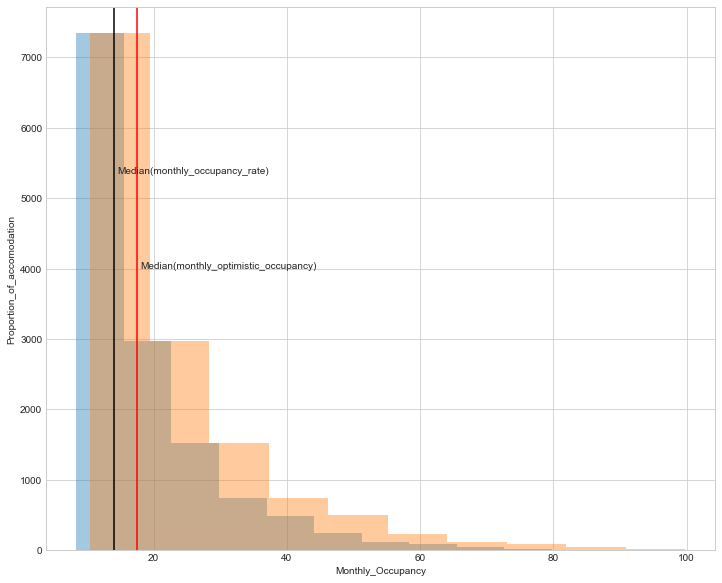

In [41]:
# comparing occupancy estimates.
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))

sns.distplot(df['monthly_occupancy_rate'], kde=False, bins=10)
sns.distplot(df['monthly_optimistic_occupancy'], kde=False, bins=10)

plt.axvline(x = 14, ymin = 0, ymax =1, color = 'black')
plt.text(14.5, 5350, 'Median(monthly_occupancy_rate)')

plt.axvline(x = 17.5, ymin = 0, ymax = 1, color = 'red')
plt.text(18, 4000, 'Median(monthly_optimistic_occupancy)')

plt.xlabel('Monthly_Occupancy')
plt.ylabel('Proportion_of_accomodation')

In [42]:
# Income estimate

df['modest_income'] = df['monthly_occupancy_rate']*12*df['price']
df['optimistic_income'] = df['monthly_optimistic_occupancy']*12*df['price']

In [43]:
df.head(2)

,listing_id,review_per_month,neighbourhood_group,latitude,longitude,host_is_superhost,id,property_type,price,accommodates,room_type,monthly_occupancy_rate,monthly_optimistic_occupancy,modest_income,optimistic_income
0,2015,2.888889,Mitte,52.534537,13.402557,t,2015,Guesthouse,60.0,3,Entire home/apt,24.27,30.33,17474.4,21837.6
1,2695,2.000000,Pankow,52.548513,13.404553,f,2695,Apartment,17.0,2,Private room,16.80,21.00,3427.2,4284.0


In [44]:
df['modest_income'].mean()

13624.682065921104

In [45]:
df['optimistic_income'].mean()

17030.837171865798

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Proportion_of_accomodation')

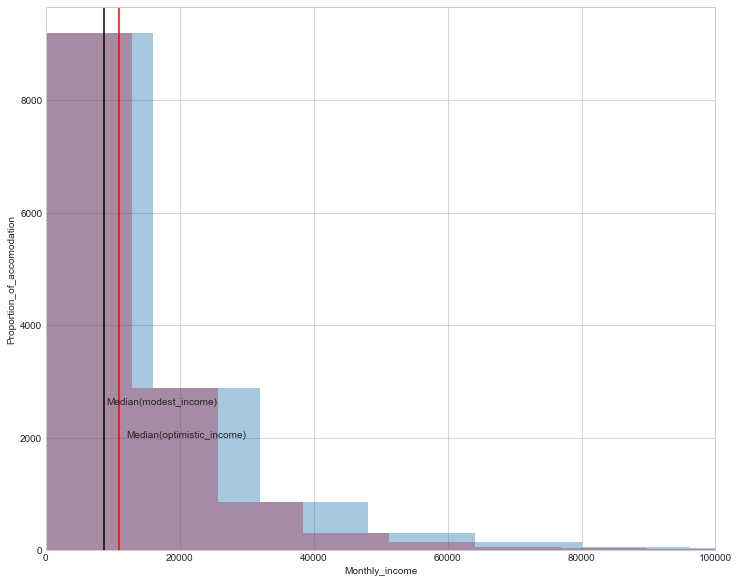

In [46]:
# optimistic_income > modest_income
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))

sns.distplot(df['modest_income'], kde=False, bins=100, color = 'red')
sns.distplot(df['optimistic_income'], kde=False, bins=100)
plt.xlim((0,100000))

plt.axvline(x = 8709, ymin = 0, ymax =1, color = 'black')
plt.text(9000, 2600, 'Median(modest_income)')

plt.axvline(x = 10886, ymin = 0, ymax = 1, color = 'red')
plt.text(12000, 2000, 'Median(optimistic_income)')

plt.xlabel('Monthly_income')
plt.ylabel('Proportion_of_accomodation')

In [47]:
#To examine if there's an underlying seasonality, let's split the dataset we loaded at the very beginning by year. 
# We will repeat the exact same steps we used earlier to pull out the full calendar year.
count_2018 = review_data[review_data['date'].isin(pd.date_range('2018-01-01', '2018-10-31'))]
count_2017 = review_data[review_data['date'].isin(pd.date_range('2017-01-01', '2017-12-31'))]
count_2016 = review_data[review_data['date'].isin(pd.date_range('2016-01-01', '2016-12-31'))]
count_2015 = review_data[review_data['date'].isin(pd.date_range('2015-01-01', '2015-12-31'))]

In [48]:
count_2018 = count_2018 .set_index('date').sort_index()
count_2017 = count_2017 .set_index('date').sort_index()
count_2016 = count_2016 .set_index('date').sort_index()
count_2015 = count_2015 .set_index('date').sort_index()

In [49]:
count_2018_monthly = count_2018.groupby([pd.TimeGrouper(freq = 'M'), 'listing_id'])['review_count'].agg({'review_count':{'review_per_month':'count'}}).reset_index()
count_2017_monthly =count_2017.groupby([pd.TimeGrouper(freq = 'M'), 'listing_id'])['review_count'].agg({'review_count':{'review_per_month':'count'}}).reset_index()
count_2016_monthly = count_2016.groupby([pd.TimeGrouper(freq = 'M'), 'listing_id'])['review_count'].agg({'review_count':{'review_per_month':'count'}}).reset_index()
count_2015_monthly = count_2015.groupby([pd.TimeGrouper(freq = 'M'), 'listing_id'])['review_count'].agg({'review_count':{'review_per_month':'count'}}).reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:3558: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  results[name] = obj.aggregate(func)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in 

In [50]:
count_2018_monthly.columns = ['date', 'listing_id', 'reviews_per_month_18']
count_2017_monthly.columns = ['date', 'listing_id', 'reviews_per_month_17']
count_2016_monthly.columns = ['date', 'listing_id', 'reviews_per_month_16']
count_2015_monthly.columns = ['date', 'listing_id', 'reviews_per_month_15']

In [51]:
count_2018_monthly.set_index('date', inplace=True)
count_2017_monthly.set_index('date', inplace=True)
count_2016_monthly.set_index('date', inplace=True)
count_2015_monthly.set_index('date', inplace=True)

In [52]:
count_2018_monthly.head()

,listing_id,reviews_per_month_18
date,,
2018-01-31,7071,3
2018-01-31,17409,2
2018-01-31,17904,3
2018-01-31,22415,2
2018-01-31,22677,4


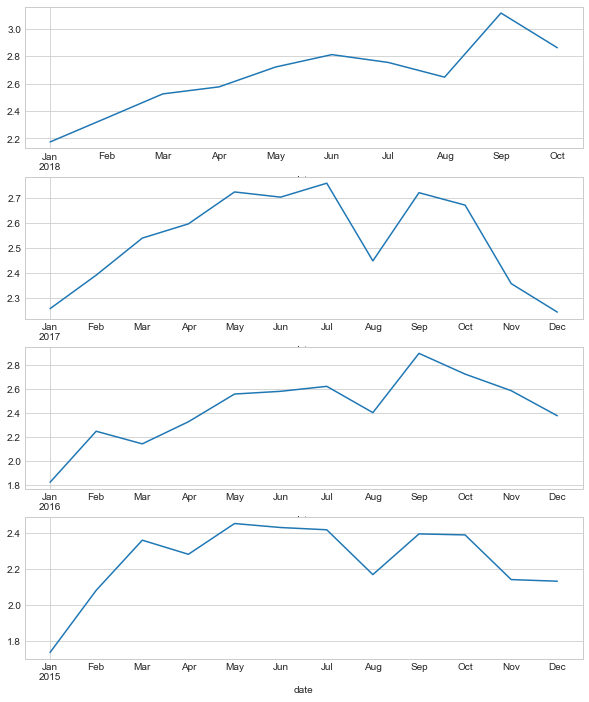

In [53]:
fig, axes = plt.subplots(4,1, figsize = (10,12))
fig_2018 = count_2018_monthly.groupby('date')['reviews_per_month_18'].mean()
fig_2018.plot(ax=axes[0])

fig_2017 = count_2017_monthly.groupby('date')['reviews_per_month_17'].mean()
fig_2017.plot(ax=axes[1])

fig_2016 = count_2016_monthly.groupby('date')['reviews_per_month_16'].mean()
fig_2016.plot(ax=axes[2])

fig_2015 = count_2015_monthly.groupby('date')['reviews_per_month_15'].mean()
fig_2015.plot(ax=axes[3])

In [54]:
# It is to be noted that for 2018 we have data till october. Thus, the trend is different from other years.
# In 2015, 2016, 2017, it is seen that the number of reviews increases around May to July and then again from september and october.
#This means this is the peak season.
# It drops significantly during August and the winter months

In [55]:
# Demand by superhost status

df.host_is_superhost.isna().sum()

2

In [56]:
# replace NaN's with value 'false' for not being a superhost

df.host_is_superhost.fillna(value='f', inplace=True)
df.host_is_superhost.isna().sum()

0

In [57]:
percent_of_superhost = (df.host_is_superhost.value_counts()['t'])*100/len(df['host_is_superhost'])

In [58]:
percent_of_superhost

21.255150088287227

In [59]:
percent_of_nonsuperhost = (df.host_is_superhost.value_counts()['f'])*100/len(df['host_is_superhost'])

In [60]:
percent_of_nonsuperhost

78.74484991171278

In [61]:
# the overall median differences between superhosts and standard hosts

df.groupby('host_is_superhost')['monthly_occupancy_rate'].mean()

host_is_superhost
f    16.047975
t    24.312894
Name: monthly_occupancy_rate, dtype: float64

In [62]:
# group by neighbourhood and by status, then take the mean occupancy.

df_1 = pd.DataFrame(df.groupby(['neighbourhood_group', 'host_is_superhost'])['monthly_occupancy_rate'].mean())
df_1.sort_values(by = 'monthly_occupancy_rate', ascending = False, inplace = True)
df_1.reset_index(inplace = True)

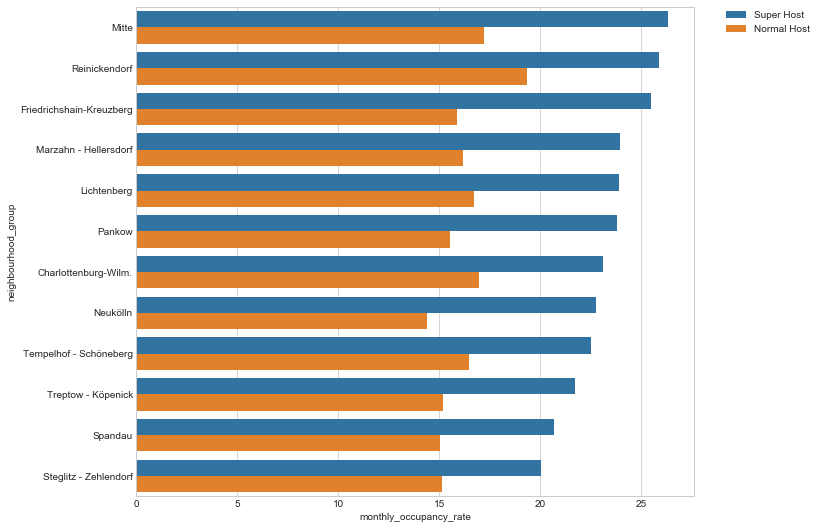

In [63]:

fig, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x='monthly_occupancy_rate', y='neighbourhood_group', hue='host_is_superhost', hue_order=['t', 'f'], 
            data=df_1)
handles, labels = ax.get_legend_handles_labels()
ax.legend((handles),('Super Host', 'Normal Host'), bbox_to_anchor=(1.05, 1),borderaxespad=0.)


In [64]:
# The plot shows that being a superhost really make a difference in the occupancy rate.

In [65]:
df_2 = pd.DataFrame(df.groupby(['neighbourhood_group', 'host_is_superhost'])['modest_income'].mean())
df_2.sort_values(by = 'modest_income', ascending = False, inplace = True)
df_2.reset_index(inplace = True)



In [72]:
df_2.groupby('host_is_superhost')['modest_income'].agg(np.median)


host_is_superhost
f     9731.830998
t    15053.636459
Name: modest_income, dtype: float64

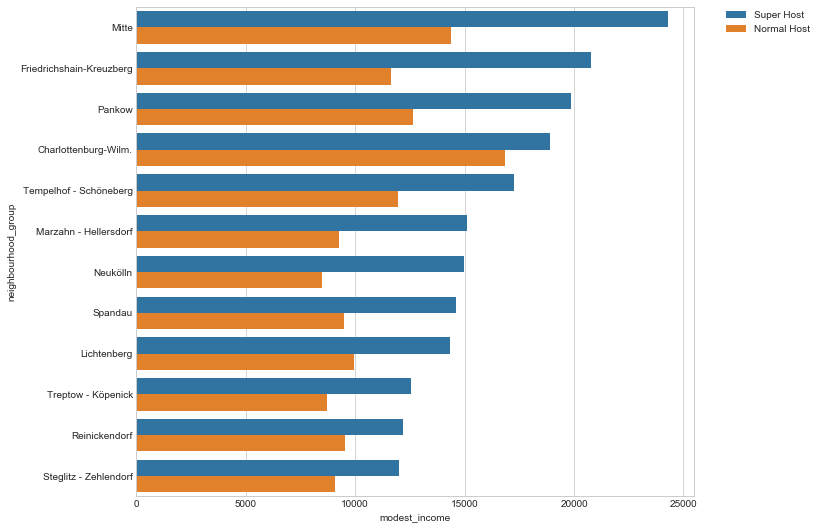

In [66]:
fig, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x='modest_income', y='neighbourhood_group', hue='host_is_superhost', hue_order=['t', 'f'], 
            data=df_2)
handles, labels = ax.get_legend_handles_labels()
ax.legend((handles),('Super Host', 'Normal Host'), bbox_to_anchor=(1.05, 1),borderaxespad=0.)

In [67]:
# The plot shows that being a superhost really make a difference in the modest income.

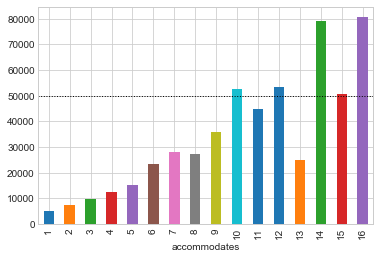

In [68]:
df.groupby('accommodates')['modest_income'].median().plot(kind = 'bar')
plt.axhline(y=50000, xmin=0, xmax=1, linewidth=1, linestyle=':', color='black')


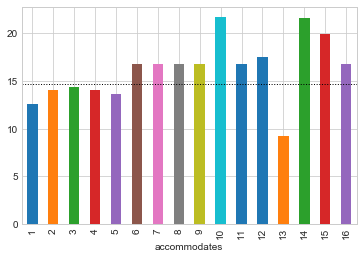

In [69]:
df.groupby('accommodates')['monthly_occupancy_rate'].median().plot(kind = 'bar')
plt.axhline(y=14.7, xmin=0, xmax=1, linewidth=1, linestyle=':', color='black')

In [70]:
# Generally, bigger homes seem to be sold more often than smaller ones. 
#Perhaps this is due to the fact that a group might be able to save more money than 1-2 persons would by using Airbnb. 
#It follows that accommodations with a bigger capacity enjoy greater popularity

In [ ]:
# Season: peak season is May to July, September and October. Thus, a person could use the apartment himself during the rest of year or have some offer during these periods to get the most out of it.
# Superhost: Superhost make a lot of difference. The occupancy rate is higher than in standard host lodging and income is 60% higher.
# Location: Maximum people are looking for accomodation in Mitte, which is the centre of Berlin. The people are  and are willing to pay more for Mitte than for lodgings in outlying districts.
# Capacity: Travellers in large groups benefits more than that in small groups. Thus, lodgings accommodating 6+ people tend to be more in-demand than smaller ones.